In [65]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

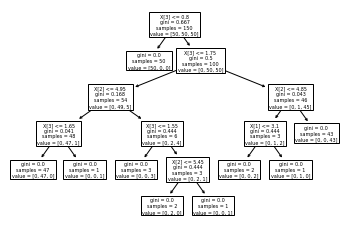

In [66]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

##### 트리 : 정보이득 : 불순도
- 불순도가 낮아지면 정보이득이 발생함 ( 기준 : gini계수 , entropy )
  - hyper parameter를 GridSearcgCV에 매개변수로 넣음 -> GridSearchCV가 조합을 만들어서 테스트함

- 의사결정 트리를 만드는 이유 : 비교를 적게하기 위해

- 과적합 발생 가능, 변수의 순서를 다르게하면 다른 결과
  - 보통 max_depth는 5로 설정함( 과적합 발생 방지 )
  - min_samples_split : 노드를 나누기 위한 최소개수(default 2 )
  - min_samples_leaf : 노드를 만들기 위한 최소개수

- leaf : 결정의 끝단( 위에는 9개 )

In [67]:
cross_val_score(clf, iris.data, iris.target, cv = 10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [68]:
print(clf.get_n_leaves())
print(clf.get_depth())
print(clf.get_params())

9
5
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}


In [69]:
print(iris.data.shape)
print(iris.feature_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [70]:
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer # 경계값(th을 기준으로 0, 1
pipe = make_pipeline(Binarizer(), MultinomialNB())

In [72]:
print(pipe.steps[0])
print(pipe[0])

#pipe['reduce_dim']

('binarizer', Binarizer(copy=True, threshold=0.0))
Binarizer(copy=True, threshold=0.0)


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # support vector classifier
from sklearn.decomposition import PCA # principle component analysis
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [74]:
print(pipe.steps[1])  # 이름 포함 출력
print(pipe[1]) # model만 나옴

('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [75]:
# 매개변수 초기화
pipe.set_params(clf__C=10) # 매개변수 전달

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

##### GridSearchCV

In [76]:
import numpy as np
def make_data(N, err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10 -1. / (X.ravel() + 0.1 )
    if err > 0:
        y += err * rng.randn(N)
    return X,y
X, y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


In [77]:
from sklearn.model_selection import GridSearchCV # parameter tuning
from sklearn.preprocessing import PolynomialFeatures # 다차원 특성축소
from sklearn.linear_model import LinearRegression
# 파이프라인 리턴
def PolynomialRegression(degree=2, **kwargs): # dict 변동 매개변수
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))
# 0~20 
# 모델의 hyper parameter 조합 
param_grid = {"polynomialfeatures__degree":np.arange(21),   # 21개
             "linearregression__fit_intercept":[True,False], #2개
             "linearregression__normalize":[True,False]} #2개
# ==> 총 84개 조합이 나오는데, 그 중 최적의 결과를 best_params에서 보여줌

In [78]:
# cross validation
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)

In [79]:
grid.fit(X,y)

C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [80]:
grid.best_params_  # 비선형회귀 4차일 경우 가장 좋은 결과

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [81]:
grid.best_estimator_  # 가장 좋은 param을 이용해 만든 모델

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [82]:
grid.best_score_

0.8956938691106144

In [83]:
X_test = np.linspace(-0.1, 1.1, 500)
X_test

array([-1.00000000e-01, -9.75951904e-02, -9.51903808e-02, -9.27855711e-02,
       -9.03807615e-02, -8.79759519e-02, -8.55711423e-02, -8.31663327e-02,
       -8.07615230e-02, -7.83567134e-02, -7.59519038e-02, -7.35470942e-02,
       -7.11422846e-02, -6.87374749e-02, -6.63326653e-02, -6.39278557e-02,
       -6.15230461e-02, -5.91182365e-02, -5.67134269e-02, -5.43086172e-02,
       -5.19038076e-02, -4.94989980e-02, -4.70941884e-02, -4.46893788e-02,
       -4.22845691e-02, -3.98797595e-02, -3.74749499e-02, -3.50701403e-02,
       -3.26653307e-02, -3.02605210e-02, -2.78557114e-02, -2.54509018e-02,
       -2.30460922e-02, -2.06412826e-02, -1.82364729e-02, -1.58316633e-02,
       -1.34268537e-02, -1.10220441e-02, -8.61723447e-03, -6.21242485e-03,
       -3.80761523e-03, -1.40280561e-03,  1.00200401e-03,  3.40681363e-03,
        5.81162325e-03,  8.21643287e-03,  1.06212425e-02,  1.30260521e-02,
        1.54308617e-02,  1.78356713e-02,  2.02404810e-02,  2.26452906e-02,
        2.50501002e-02,  

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

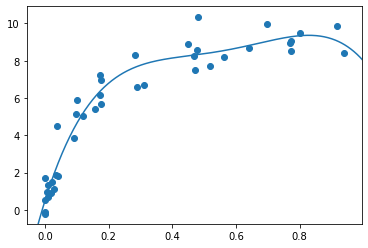

In [93]:
import matplotlib.pyplot as plt
model = grid.best_estimator_
X_test = np.linspace(-0.1, 1.1, 500)[:,None]  #[:,None] : 데이터를 열로 표현
plt.scatter(X.ravel(), y)  # ravel : 데이터를 평평하게 1차원으로 만듬
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)


In [22]:
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 
          12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10] 
outliers = []
def detect_outlier(data_1) :
    threshold = 3
    mean_1 = np.mean(data_1) 
    std_1 = np.std(data_1)
    for y in data_1:
        z_score = (y-mean_1)/std_1 # Z점수 
        if np.abs(z_score) > threshold:  # threshold 문지방: 경계값
            outliers.append(y)
    return outliers
# ==> 이상치를 걸러내는 것( Z_점수가 높은 데이터를 가져옴 )


outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)

[100]


[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
[[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]


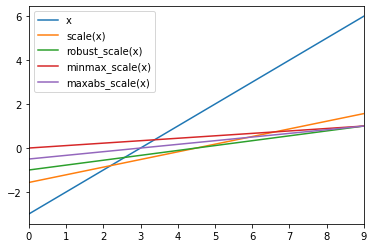

In [23]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

# scale  : z점수
# robust_scale  : 평균 : median / IQR
# maxabs_scale : -1 ~ 1
print((np.arange(10, dtype = np.float) -3))
x = (np.arange(10, dtype = np.float)-3).reshape(-1,1)
print(x)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns = ['x','scale(x)','robust_scale(x)','minmax_scale(x)','maxabs_scale(x)'])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균 :  [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std :  [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 평균 :  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std :  [1. 1. 1. 1.]


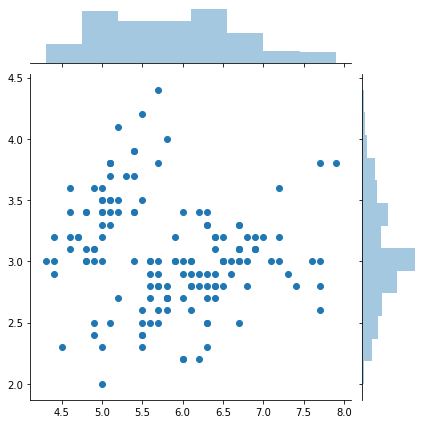

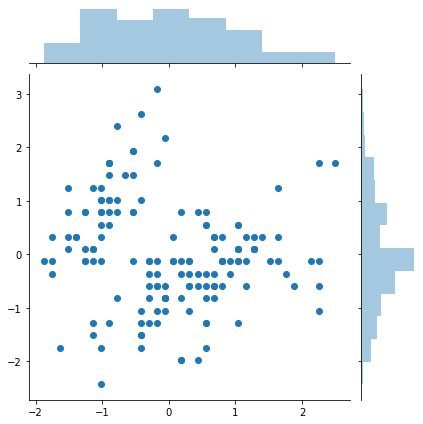

In [24]:
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
data1 = iris.data
data2 = scale(iris.data)
print("전처리전 평균 : ", np.mean(data1, axis = 0))
print("전처리전 std : ", np.std(data1, axis =0))
print("전처리후 평균 : ", np.mean(data2, axis = 0))
print("전처리후 std : ", np.std(data2, axis =0))
sns.jointplot(data1[:,0], data1[:,1])
plt.show()
sns.jointplot(data2[:,0], data2[:,1])
plt.show()


# ==> 분포는 동일함
# ==> 정규화하는 이유 : 변수기여도를 동일하게 하기 위해

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 인스턴스
scaler.fit(data1) 
data2= scaler.transform(data1) # transformer(전처리), estimator(모델)
data1.std(), data2.std()

(1.9738430577598278, 1.0)

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X= np.array([[0],[1],[2]])
print(X)

ohe.fit(X)
print(ohe.n_values_, ohe.feature_indices_, ohe.active_features_)
ohe.categories_

[[0]
 [1]
 [2]]
[3] [0 3] [0 1 2]


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be 

[array([0., 1., 2.])]

In [27]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [28]:
X = np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]])
ohe.fit(X)
print(ohe.n_values, ohe.feature_indices_,ohe.active_features_)
ohe.categories
print(ohe.transform(X).toarray())

# ==> 3자리 => 10자리 변경 * 1번자리 : 0 또는 1 2가지
#                           2번자리 : 0 또는 1 또는 2  3가지
#                           3번자리 : 5가지 ==> 10가지

None [ 0  2  5 10] [0 1 2 3 4 5 6 7 8 9]
[[1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]]


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``active_features_`` attribute was deprecated in version 0.20 and w

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1,2,2,6])
le.classes_

array([1, 2, 6])

In [30]:
le.transform([1,1,2,6])  # le label의 0번 ,0번 ,1 번, 2번 

array([0, 0, 1, 2], dtype=int64)

In [31]:
le.inverse_transform([0,0,1,2])  # 

array([1, 1, 2, 6])

In [32]:
data = ['서울','서울','대전','부산']
le = LabelEncoder()
le.fit(data)
print(le.classes_)
print(le.transform(data))
print(le.inverse_transform([2,2,0,1]))

['대전' '부산' '서울']
[2 2 0 1]
['서울' '서울' '대전' '부산']


In [33]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse= False)
D = [{'foo':1,'bar':2},{'foo':3,'baz':1}]
X = v.fit_transform(D)
X

# ==>    'bar' 'baz'  'foo'
#          2     0      1
#          0     1      3 


array([[2., 0., 1.],
       [0., 1., 3.]])

In [34]:
v.feature_names_

['bar', 'baz', 'foo']

In [35]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [36]:
# 결측치 저리

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # median, most_frequancy(최빈값),
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])  # 열 별 평균을 넣는 것
X = [[np.nan, 2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [37]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [38]:
# [1, a, b, a**2, ab , b**2] ==> 비선형 회귀 
poly = PolynomialFeatures(2) # 다항식 계산 결과값을 속성값으로 추가( 2 차방정식 )
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

### RandomForest : Dicision Tree를 여러 개의 모델로 구축
   (ensemble 학습 : 여러 개의 모델을 통해 학습 하는 것)
- 연속형 : 결과값의 평균으로 예측
- 이산형 : 결과값의 투표를 통해 예측

In [39]:
from sklearn.datasets import make_classification
X,y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 30)
rf.fit(X,y)

# n_estimator = 10  == DT가 10개

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
print("Accuracy : \n", (y == rf.predict(X)).mean())
#n_estimators가 10일 때,  30일 때 정확도가 다름

Accuracy : 
 1.0


Text(0.5, 1.0, '특성 중요도')

C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53

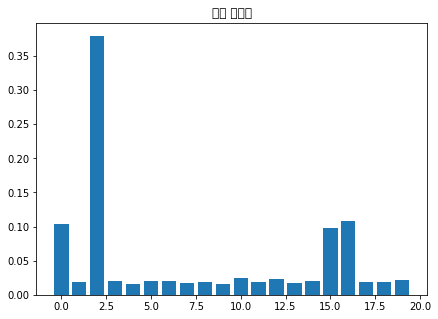

In [41]:
f,ax = plt.subplots(figsize = (7,5))
ax.bar(range(0, len(rf.feature_importances_)),
      rf.feature_importances_)
ax.set_title('특성 중요도')

In [42]:
print("특성수 :", rf.n_features_)
print("모델 : ",rf.estimators_)

특성수 : 20
모델 :  [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1736541254, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1502007397, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
               

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[(0.44, 'LSTAT'), (0.36, 'RM'), (0.08, 'DIS'), (0.04, 'CRIM'), (0.02, 'NOX'), (0.01, 'TAX'), (0.01, 'PTRATIO'), (0.01, 'INDUS'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'CHAS')]


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<BarContainer object of 13 artists>

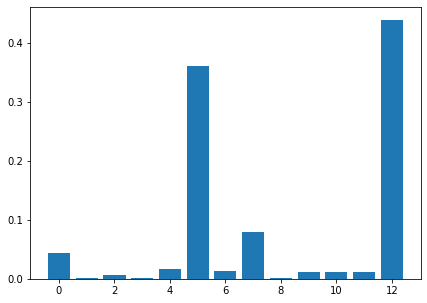

In [43]:
# 문제 : load_boston()을 이용하여 데이터를 로딩하고, rf 변수로 변수 중요도를 출력하세요

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
X = boston['data']
y = boston['target']
names = boston['feature_names']
print(names)
rf = RandomForestRegressor()
rf.fit(X,y)
print(sorted(zip(map(lambda x: round(x,2),
                    rf.feature_importances_), names), reverse = True))
f, ax = plt.subplots(figsize =(7,5))
ax.bar(range(0, len(rf.feature_importances_)),
      rf.feature_importances_)

In [48]:
# 평가 : 예측

#- 상관계수 , mse()(mean square error)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y, rf.predict(X))

1.7753353754940715

In [49]:
mean_absolute_error(y, rf.predict(X))

0.8919565217391305

In [50]:
r2_score(y, rf.predict(X))

0.978970093467325

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split  # 0.75 : 0.25
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


In [53]:
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[0], out_file='tree.dot',
               class_names = ['악성','양성'],
               feature_names = cancer.feature_names, impurity = False, filled = True)

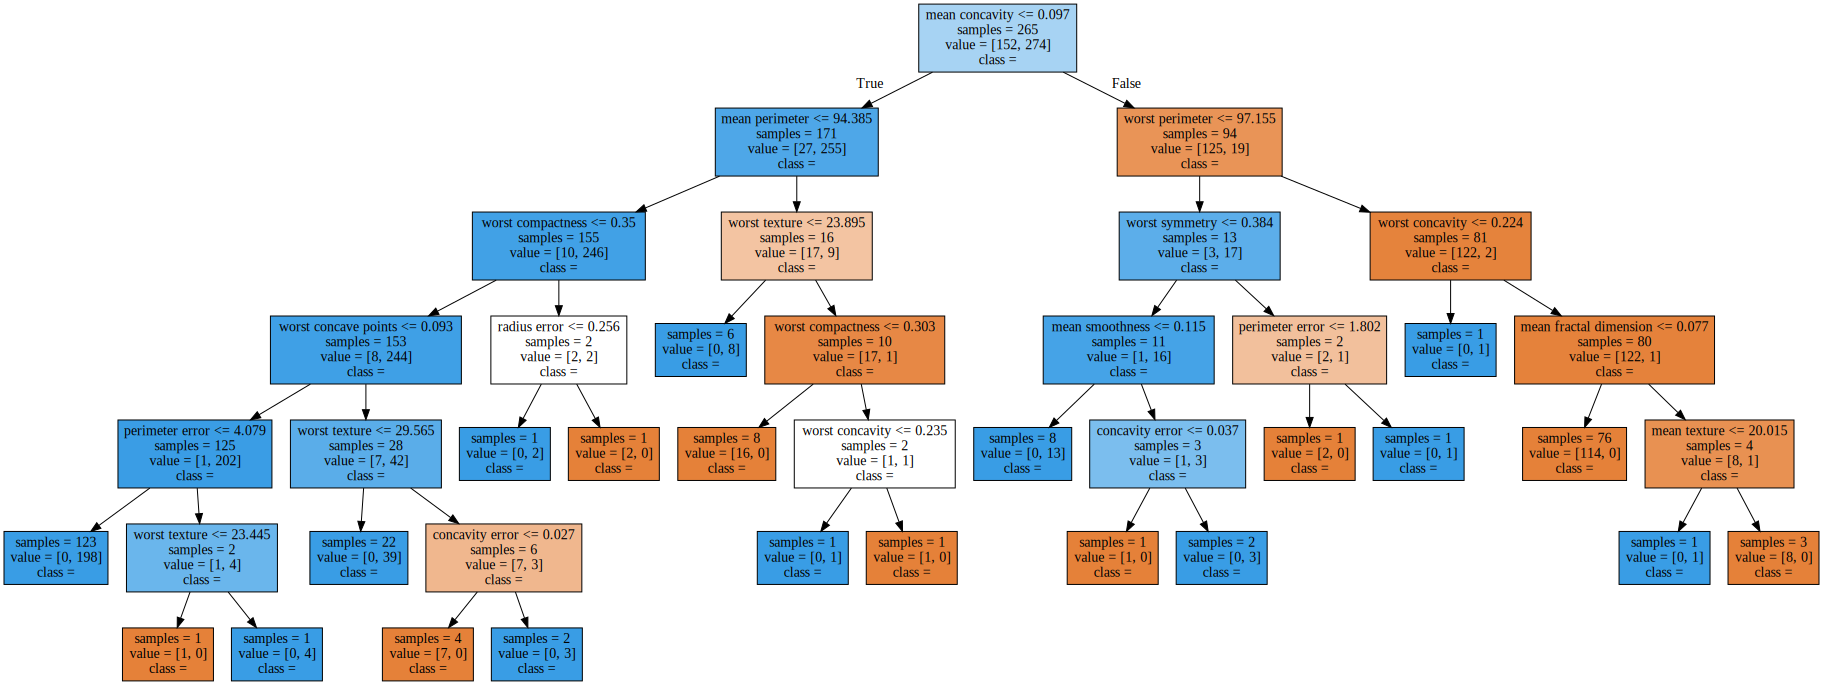

In [54]:
from IPython.display import display  # 
import graphviz
with open("tree.dot", 'rt', encoding = 'utf-8') as f: # rt : 읽기전용
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [55]:
import pandas as pd
boston = load_boston() # data(독립변수s), target(종속변수),feature_names
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

data.head()
data['PRICE'] = boston.target  # data와 target을 하나의 데이터로 묶음
data.head()
print(data.info())
data.describe()

import xgboost as xgb
from sklearn.metrics import mean_squared_error # xgboost는 평가함수가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB
None


C:\Users\ICT01_18\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_18\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[09:35:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 10.449300


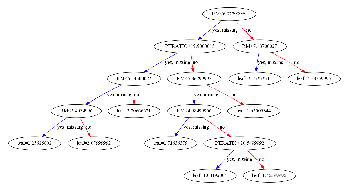

In [56]:
# dataframe은 ndarray + dict(순서 보장, 중복 허용)

X,y = data.iloc[:,:-1], data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label =y)  # 전용행렬 ( 속도가 빠른 이유 ) data와 label(종속변수)를 넣음
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =123)
xg_reg = xgb.XGBRegressor(objective = 'reg:linear',  # 선형회귀 방식
                         colsample_bytree = 0.3,
                         learning_rate = 0.1, max_depth = 5,  # learning rate : 경사하강법에 등장   * 경사하강법 : optimization
                         alpha = 10, n_estimators = 10)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)  # ybar 결정 ( 예측치 )
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE : %f" % (rmse))



xgb.plot_tree(xg_reg,num_trees = 0)
plt.rcParams['figure.figsize'] = [50,20]
plt.show()

In [57]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

dataset = loadtxt('pima.data', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


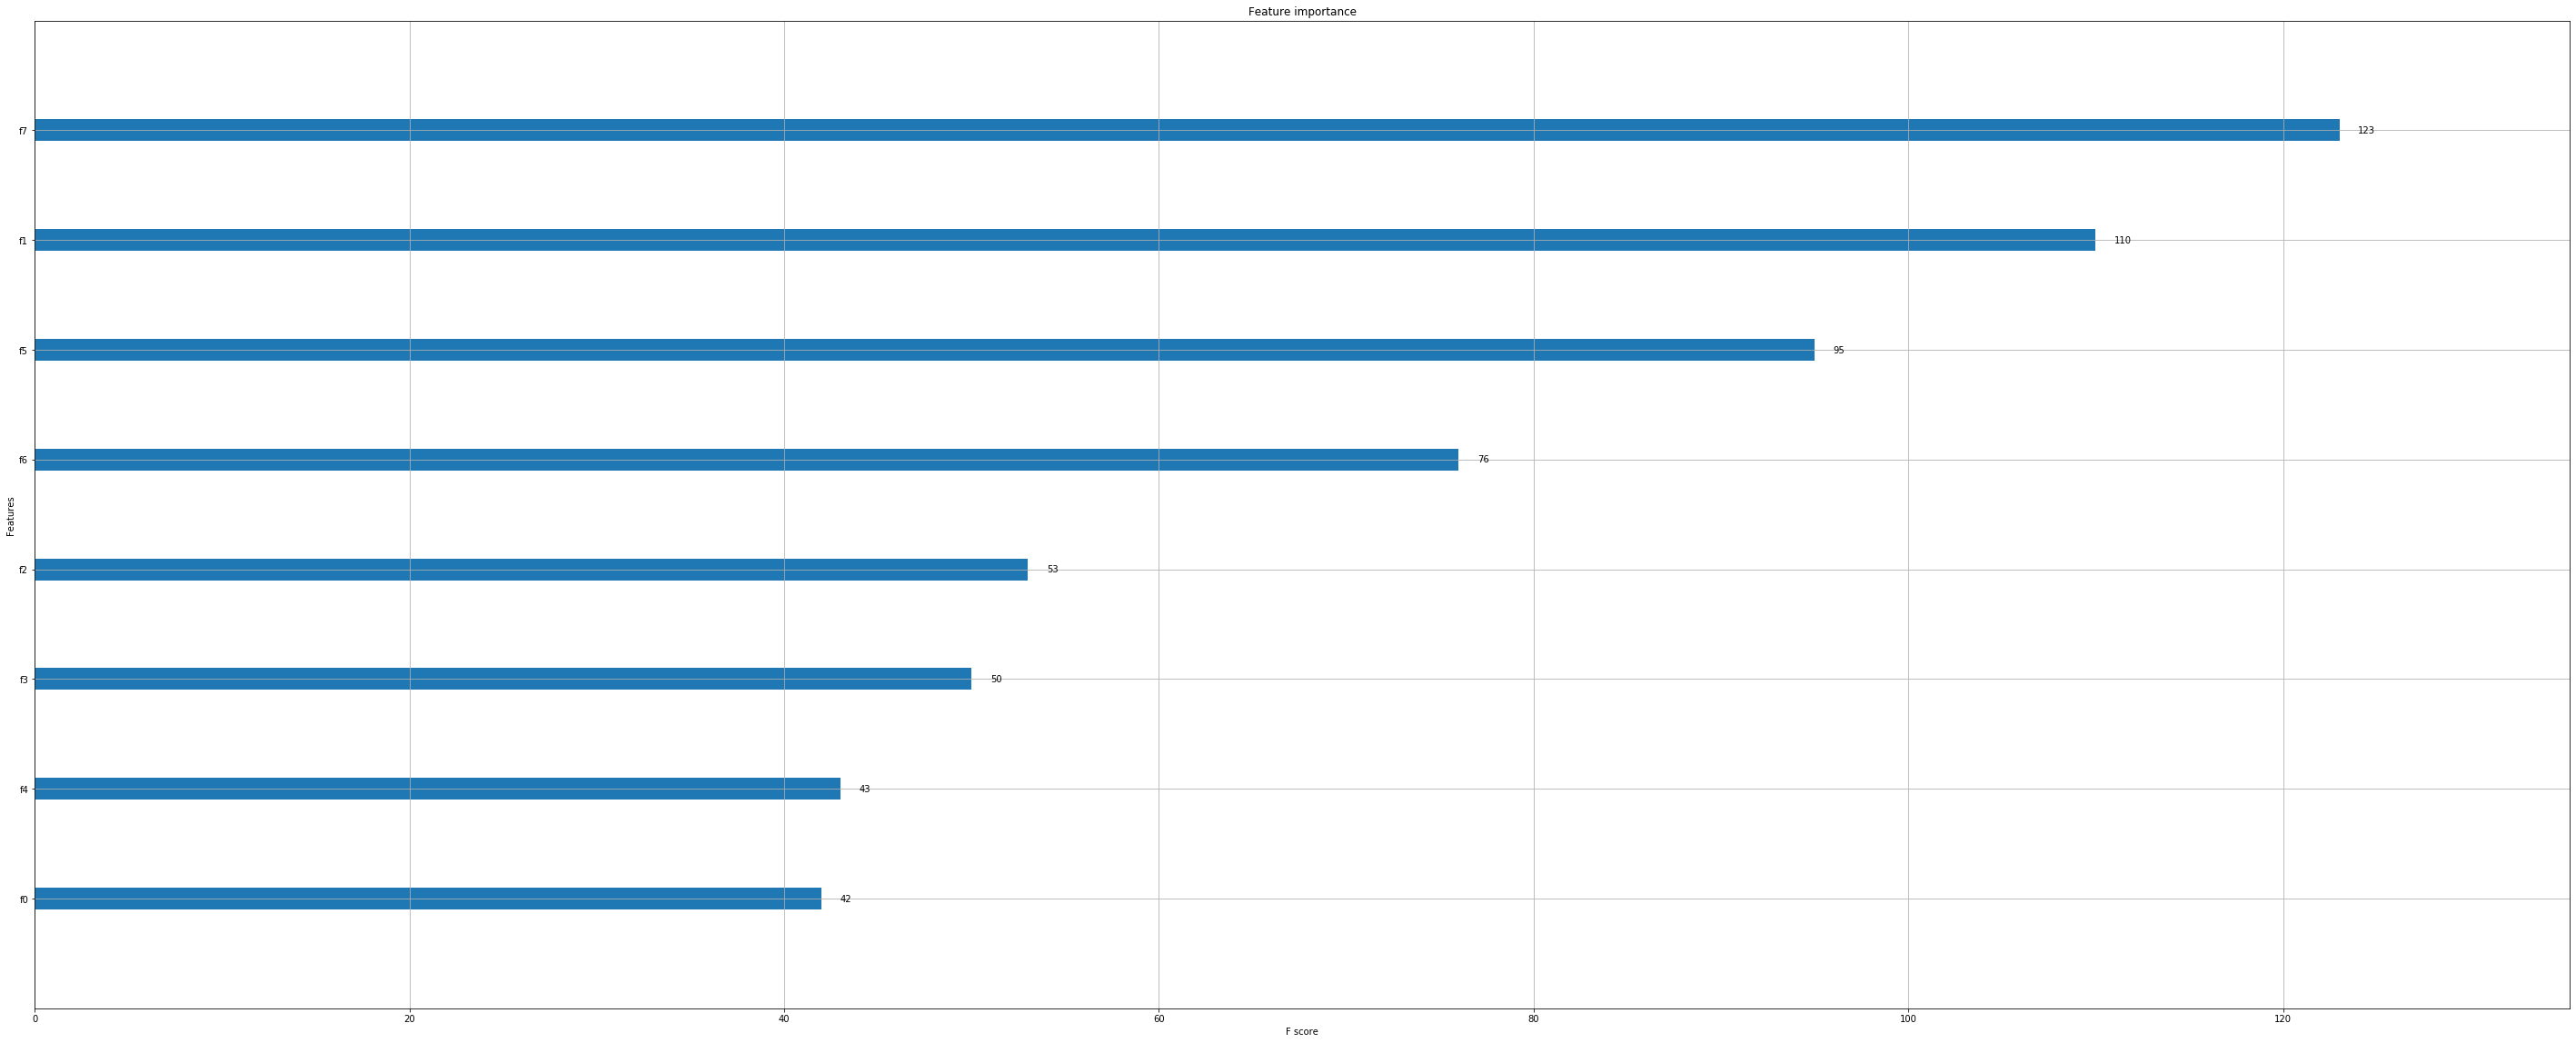

In [58]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

In [59]:
y_pred  = model.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("정확도 : %.2f%% " % (accuracy * 100.0))

[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]
정확도 : 77.95% 


In [60]:
from sklearn.feature_selection import SelectFromModel
thresholds = np.sort(model.feature_importances_)

In [61]:
for thresh in thresholds : 
    selection = SelectFromModel(model, threshold = thresh,
                               prefit=True)
    select_X_train = selection.transform(X_train)
    # 경계선 이하의 중요성을 가진 변수 제거
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test) # 테스트용 데이터 변환
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresg = %.3f, n= %d, Accuracy: %.2f%%" % (thresh,
                    select_X_train.shape[1], accuracy*100.0))

Thresg = 0.078, n= 8, Accuracy: 77.95%
Thresg = 0.080, n= 7, Accuracy: 76.38%
Thresg = 0.085, n= 6, Accuracy: 77.56%
Thresg = 0.095, n= 5, Accuracy: 76.38%
Thresg = 0.102, n= 4, Accuracy: 76.38%
Thresg = 0.109, n= 3, Accuracy: 74.80%
Thresg = 0.160, n= 2, Accuracy: 75.98%
Thresg = 0.292, n= 1, Accuracy: 70.08%


In [62]:
import pickle # 메모리의 내용을 그대로 저장 
pickle.dump(model , open("pima.pickle.dat", 'wb'))
loaded_model = pickle.load(open("pima.pickle.dat", 'rb'))
y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : %.2f%% " % (accuracy*100.0))

Accuracy : 77.95% 
